## First ML Model

This was my first ever attempt at training a ML model for predictive data analysis. I have learned and grown a lot since this, and I am working on a little rewrite to clean the code up a bit. However, I wanted to include this on my github to show how far I've come in the 6 months since I made this, when I eventually upload my final MSc project, along with a rewrite of this.

Looking back, this was a good attempt, but I'd like to see better handling of the data, more datasets overall, and better commenting. I would make the code more modular, so it won't completely break if one section fails, and I'd use functions more often.

However, I went from zero knowledge of Python to building this in 6 months. So, for my situation, this was a great milestone!

In [ ]:

#First, import necessary libraries

import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt # data visualization
import ipywidgets as widgets # interactive widgets
from ipywidgets import Box
from scipy import stats

%matplotlib inline #for data visualisation in Jupyter notebook


#Import CSV and view data
df = pd.read_csv('/content/spotify30ksongs.csv') # or whichever dataset you'd like to try that has the same columns

df.describe()

#df.dtypes
display(df)

#print(df.dtypes)

#Clean the data:

#Clean 1 = Removing duplicates and irrelevant data
df.drop(['track_id', 'track_artist', 'track_album_name', 'key', 'track_name', 'track_album_id', 'track_album_release_date', 'playlist_genre', 'playlist_id', 'playlist_name', 'playlist_subgenre'],axis=1, inplace=True)

#Clean 2 = Arrangement
df['mode'] = np.where(df['mode']=='Major', 1, 0)

#Clean 3 Song duration conversion
df['duration_ms'] = df['duration_ms'] / 1000
df.rename(columns={'duration_ms': 'duration_s'}, inplace=True)

#Clean 4 Organise data
df.reset_index(drop=True, inplace=True)

#Separate Popularity from variables
X= df.loc[:,df.columns !='track_popularity']
y = df['track_popularity'].squeeze()

#Display popularity variation (for personal reference)
df_high_popularity = df[df['track_popularity'] > 90]

mean_values = df_high_popularity[['danceability', 'valence', 'energy', 'instrumentalness', 'loudness', 'mode', 'duration_s']].mean()
mode_values = df_high_popularity[['danceability', 'valence', 'energy', 'instrumentalness', 'loudness', 'mode', 'duration_s']].mode().iloc[0]

df_high_popularity.plot()
plt.tight_layout()
plt.show()

print(mean_values)
#print(mode_values)

#Separate into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Save those as arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

#Poly degree
degree = 5

#Model samples
model_regression = linear_model.LinearRegression()
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
poly_model = LinearRegression()
model_random_forest = RandomForestRegressor()

#Fit models
model_regression.fit(X_train, y_train)
poly_model.fit(X_poly, y_train)
model_random_forest.fit(X_train, y_train)

y_pred_train = model_regression.predict(X_train)
y_pred_test = model_regression.predict(X_test)

y_pred_train_poly = poly_model.predict(X_poly)
y_pred_test_poly = poly_model.predict(X_poly_test)

y_pred_train_RF = model_random_forest.predict(X_train)
y_pred_test_RF = model_random_forest.predict(X_test)

#Estimate scores on training and testing data
#MSE Scores:
LRMSE = mean_squared_error(y_train, y_pred_train)
LRtestMSE = mean_squared_error(y_test, y_pred_test)

PolyMSE = mean_squared_error(y_train, y_pred_train_poly)
PolytestMSE = mean_squared_error(y_test, y_pred_test_poly)

RFMSE = mean_squared_error(y_train, y_pred_train_RF)
RFtestMSE = mean_squared_error(y_test, y_pred_test_RF)

print("Linear Reg Mean Squared Error: ", LRMSE)
print("Linear Reg Test Mean Squared Error: ", LRtestMSE)
print("Poly Mean Squared Error: ", PolyMSE)
print("Poly Test Mean Squared Error: ", PolytestMSE)
print("Random Forest Mean Squared Error: ", RFMSE)
print("Random Forest Test Mean Squared Error: ", RFtestMSE)

#R2 Scores
R2LR = model_regression.score(X_train, y_train)
R2LRtest = model_regression.score(X_test, y_test)

PolyR2 = poly_model.score(X_poly, y_train)
PolyR2Test = poly_model.score(X_poly_test, y_test)

RFR2 = model_random_forest.score(X_train, y_train)
RFR2Test = model_random_forest.score(X_test, y_test)

print('Linear Reg Coefficient of determination: ', R2LR)
print('Linear Reg Test Coefficient of determination: ', R2LRtest)
print('Poly Coefficient of determination: ', PolyR2)
print('Poly Test Coefficient of determination: ', PolyR2Test)
print('Random Forest Coefficient of determination: ', RFR2)
print('Random Forest Coefficient of determination: ', RFR2Test)

#save files and model (commented out since this isn't needed for every test)
#from joblib import dump
#from google.colab import files
#from google.colab import drive
#drive.mount('/content/gdrive')

#dump(model_random_forest, 'FILENAME.joblib')
#dump(model_random_forest, '/content/gdrive/My Drive/FILENAME.joblib')

#files.download('FILENAME.joblib')

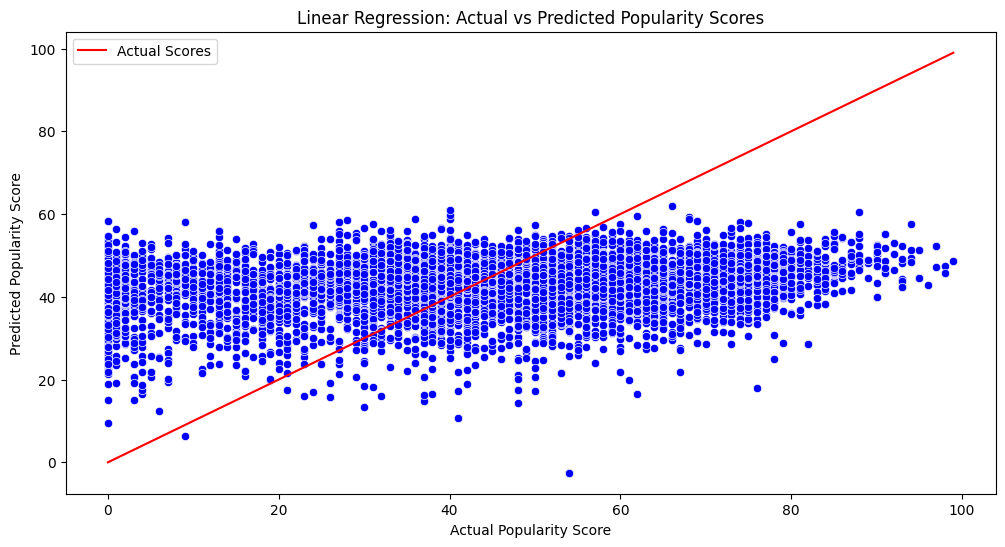

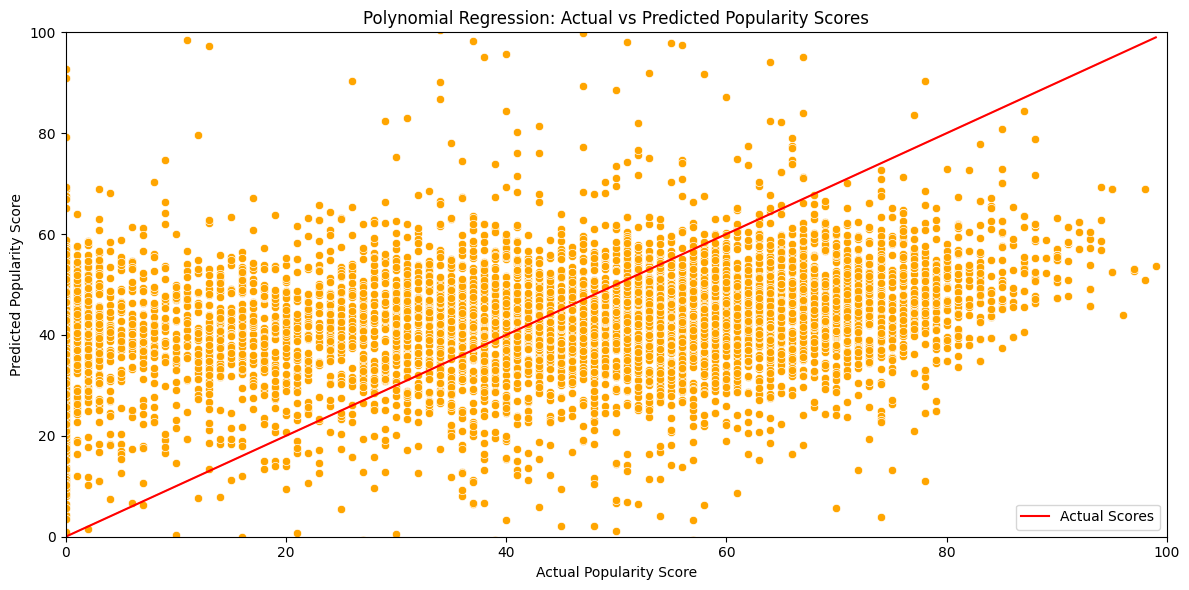

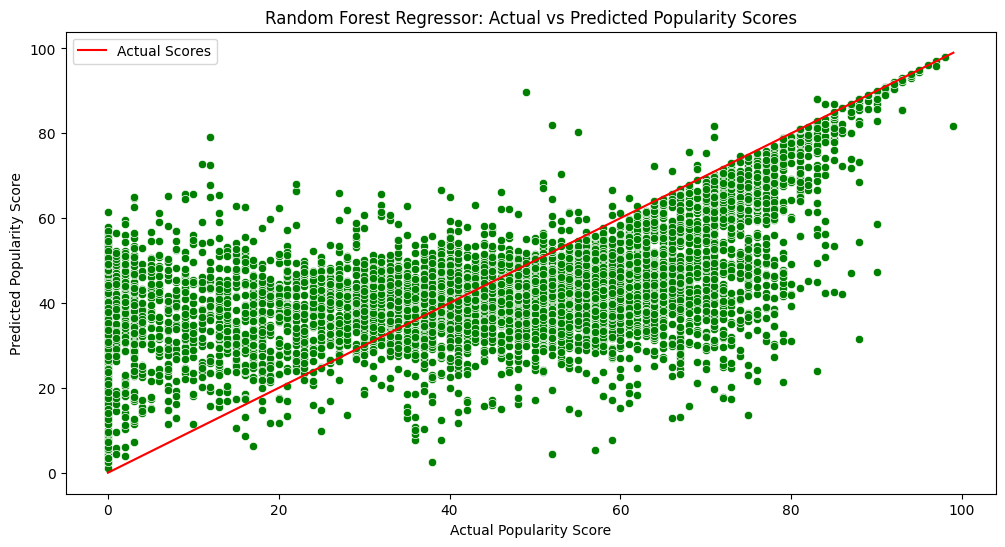

In [ ]:
#Scatter plot for Linear Regression
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred_test, color='blue')
sns.lineplot(x=y_test, y=y_test, color='red', label='Actual Scores')
plt.title('Linear Regression: Actual vs Predicted Popularity Scores')
plt.xlabel('Actual Popularity Score')
plt.ylabel('Predicted Popularity Score')
plt.show()

#Scatter plot for Polynomial Regression
#Note: #It is difficult to fit this graph type to polynomial regression due to the added dimensionality that the technique creates in the data
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred_test_poly, color='orange')
sns.lineplot(x=y_test, y=y_test, color='red', label='Actual Scores')
plt.title('Polynomial Regression: Actual vs Predicted Popularity Scores')
plt.xlabel('Actual Popularity Score')
plt.ylabel('Predicted Popularity Score')
plt.ylim(0,100)
plt.xlim(0,100)
plt.tight_layout()
plt.show()

#Scatter plot for Random Forest Regressor
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred_test_RF, color='green')
sns.lineplot(x=y_test, y=y_test, color='red', label='Actual Scores')
plt.title('Random Forest Regressor: Actual vs Predicted Popularity Scores')
plt.xlabel('Actual Popularity Score')
plt.ylabel('Predicted Popularity Score')
plt.show()

#plt.savefig('UseWhenNeedToSave.png')

#files.download('UseWhenNeedToSave.png')

In [ ]:
#Data visualisation, bar
results = pd.DataFrame()
results['Actual'] = y_test
results['linear'] = y_pred_test
results['poly'] = y_pred_test_poly
results['random'] = y_pred_test_RF

#MeanAbsoluteError
results['linear_mae'] = np.abs(results['Actual'] - results['linear']) # MAE = |actual - predicted|
results['poly_mae'] = np.abs(results['Actual'] - results['poly'])
results['random_mae'] = np.abs(results['Actual'] - results['random'])

#Mean MAE
mean_mae = results[['linear_mae', 'poly_mae', 'random_mae']].mean()
print(mean_mae)

#Compare
plt.figure(figsize=(10,6))
plt.bar(['Linear', 'Poly', 'Random'], mean_mae, color=['blue', 'red', 'green'])
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.title('Comparison of Prediction Results')
#plt.savefig('UseWhenNeedToSave.png')
plt.show()
#files.download('UseWhenNeedToSave.png')

In [ ]:
#Line graph

test_samples = 50
regression = []
random_forest = []
poly_model_list = []
poly_model = poly_model.fit(X_poly, y_train)
ground_truth = []
for i in range(test_samples):
    regression.append(model_regression.predict([X_test[i]]))
    poly_model_list.append(poly_model.predict([X_poly[i]]))
    random_forest.append(model_random_forest.predict([X_test[i]]))
    ground_truth.append(y_test[i])
plt.plot(range(len(regression)), regression, label='Linear Regression')
plt.plot(range(len(random_forest)), random_forest, label='Random Forest')
plt.plot(range(len(poly_model_list)), poly_model_list, label='Poly Model')
plt.plot(range(len(ground_truth)), ground_truth, label='Ground Truth')
plt.xlim([0, test_samples])
plt.ylim([0, 100])
plt.xlabel('songs')
plt.ylabel('popularity')
#plt.savefig('UseWhenNeedToSave.png')
plt.legend()
plt.show()

#files.download('UseWhenNeedToSave.png')

In [ ]:
import seaborn as sns
#Distribution plots for Linear Regression, Polynomial Regression, and Random Forest Regressor
plt.figure(figsize=(18, 6))

#Linear Regression
plt.subplot(1, 3, 1)
sns.histplot(y_pred_test, bins=30, kde=True, color='blue', label='Linear Regression Predicted')
plt.title('Distribution of Predicted Popularity Scores (Linear Regression)')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.legend()

#Polynomial Regression
#Like bar and scatter graphs, it is difficult to fit this graph type to polynomial regression due to the added dimensionality that the technique creates in the data
plt.subplot(1, 3, 2)
sns.histplot(y_pred_test_poly, bins=30, kde=True, color='orange', label='Polynomial Regression Predicted')
plt.title('Distribution of Predicted Popularity Scores (Polynomial Regression)')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.legend()

#Random Forest Regressor
plt.subplot(1, 3, 3)
sns.histplot(y_pred_test_RF, bins=30, kde=True, color='green', label='Random Forest Predicted')
plt.title('Distribution of Predicted Popularity Scores (Random Forest Regressor)')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()